<a href="https://colab.research.google.com/github/AravindKrishnaR/Movie-Reviews-Classification/blob/main/new_classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import nltk
#nltk.download('all')

In [ ]:
from nltk.corpus import movie_reviews 
import matplotlib.pyplot as plt
from random import shuffle  
from nltk import FreqDist
from nltk.corpus import stopwords
import string
import pandas as pd
import plotly.express as px
from wordcloud import WordCloud
from nltk import NaiveBayesClassifier
from nltk import classify 
from nltk.tokenize import word_tokenize
from nltk import ngrams 


print (len(movie_reviews.fileids()))  
print (movie_reviews.categories()) 
print (len(movie_reviews.fileids('pos'))) 
print (len(movie_reviews.fileids('neg'))) 
pos_rev_file = movie_reviews.fileids('pos')[0] 
print (pos_rev_file) 

2000
['neg', 'pos']
1000
1000
pos/cv000_29590.txt


In [ ]:
all_reviews = []
 
for category in movie_reviews.categories():
    for fileid in movie_reviews.fileids(category):
        #all_reviews.append((list(movie_reviews.words(fileid)), category))
        all_reviews.append((movie_reviews.words(fileid), category))
 
print (len(all_reviews))
print (all_reviews[0])
shuffle(all_reviews)

2000
(['plot', ':', 'two', 'teen', 'couples', 'go', 'to', ...], 'neg')


In [ ]:
all_wrds = [word.lower() for word in movie_reviews.words()] 
print (all_wrds[:10])

['plot', ':', 'two', 'teen', 'couples', 'go', 'to', 'a', 'church', 'party']


In [ ]:
word_freq = FreqDist(all_wrds) 
print (word_freq)
print (word_freq.most_common(10))

<FreqDist with 39768 samples and 1583820 outcomes>
[(',', 77717), ('the', 76529), ('.', 65876), ('a', 38106), ('and', 35576), ('of', 34123), ('to', 31937), ("'", 30585), ('is', 25195), ('in', 21822)]


In [ ]:
stpwrds_eng = stopwords.words('english')
print (stpwrds_eng)
words_no_sws = [word for word in all_wrds if word not in stpwrds_eng]

print (words_no_sws[:10])

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [ ]:
print (string.punctuation)

words_no_punct = [word for word in all_wrds if word not in string.punctuation]
print (words_no_punct[:10])

!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~
['plot', 'two', 'teen', 'couples', 'go', 'to', 'a', 'church', 'party', 'drink']


In [ ]:
clean_words = []
for word in all_wrds:
    if word not in stpwrds_eng and word not in string.punctuation:
        clean_words.append(word)
print (clean_words[:10])

['plot', 'two', 'teen', 'couples', 'go', 'church', 'party', 'drink', 'drive', 'get']


In [ ]:
all_wrds_freq = FreqDist(clean_words)
print (all_wrds_freq)
print (all_wrds_freq.most_common(10))

<FreqDist with 39586 samples and 710578 outcomes>
[('film', 9517), ('one', 5852), ('movie', 5771), ('like', 3690), ('even', 2565), ('good', 2411), ('time', 2411), ('story', 2169), ('would', 2109), ('much', 2049)]


In [ ]:
print (len(all_wrds_freq)) 
 
m_com_wrds = all_wrds_freq.most_common(2000)
print (m_com_wrds[:10])

print (m_com_wrds[1990:])
 
word_features = [item[0] for item in m_com_wrds]
print (word_features[:10])



m_com_uni = dict(m_com_wrds[:10])
temp = pd.DataFrame(columns = ["Common.wrds" , 'Frequency'])
temp["Common.wrds"] = list(m_com_uni.keys())
temp["Frequency"] = list(m_com_uni.values())
fig = px.bar(temp, x="Frequency", y="Common.wrds", title='Common Words in the reviews', orientation='h', 
             width=600, height=600,color='Common.wrds')
fig.show()

39586
[('film', 9517), ('one', 5852), ('movie', 5771), ('like', 3690), ('even', 2565), ('good', 2411), ('time', 2411), ('story', 2169), ('would', 2109), ('much', 2049)]
[('remain', 64), ('anna', 64), ('moved', 64), ('asking', 64), ('genuinely', 64), ('rain', 64), ('path', 64), ('aware', 64), ('causes', 64), ('international', 64)]
['film', 'one', 'movie', 'like', 'even', 'good', 'time', 'story', 'would', 'much']


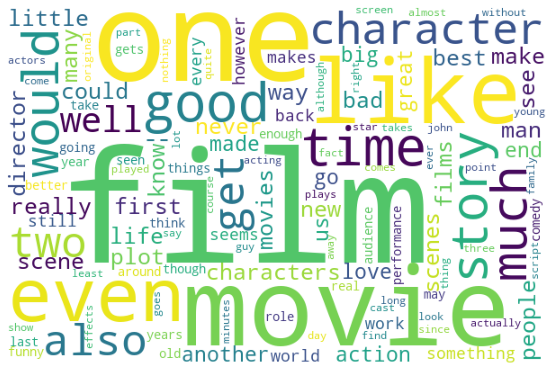

In [ ]:
filtr_wrd = dict(m_com_wrds)

wcloud = WordCloud(width = 600, height = 400, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate_from_frequencies(filtr_wrd)
 
plt.figure(figsize = (8, 5), facecolor = None) 
plt.imshow(wcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

In [ ]:
def doc_featrs(doc):
    doc_wrds = set(doc)
    features = {}
    for word in word_features:
        features['contains(%s)' % word] = (word in doc_wrds)
    return features

movie_review_file = movie_reviews.fileids('neg')[0] 
print (movie_review_file)

neg/cv000_29416.txt


In [ ]:
feat_set = [(doc_featrs(doc), category) for (doc, category) in all_reviews]
print (feat_set[0])

({'contains(film)': True, 'contains(one)': False, 'contains(movie)': False, 'contains(like)': True, 'contains(even)': False, 'contains(good)': True, 'contains(time)': True, 'contains(story)': False, 'contains(would)': True, 'contains(much)': True, 'contains(character)': True, 'contains(also)': True, 'contains(get)': True, 'contains(two)': True, 'contains(well)': True, 'contains(characters)': True, 'contains(first)': False, 'contains(--)': False, 'contains(see)': True, 'contains(way)': True, 'contains(make)': True, 'contains(life)': False, 'contains(really)': True, 'contains(films)': True, 'contains(plot)': False, 'contains(little)': True, 'contains(people)': False, 'contains(could)': False, 'contains(scene)': False, 'contains(man)': True, 'contains(bad)': False, 'contains(never)': True, 'contains(best)': True, 'contains(new)': True, 'contains(scenes)': False, 'contains(many)': True, 'contains(director)': False, 'contains(know)': False, 'contains(movies)': False, 'contains(action)': Fal

In [ ]:
print (len(feat_set)) 

test_set = feat_set[:400]
train_set = feat_set[400:]
 
print (len(train_set)) 
print (len(test_set)) 

2000
1600
400


In [ ]:
classifier = NaiveBayesClassifier.train(train_set)

In [ ]:
acc = classify.accuracy(classifier, test_set)
print ('Accuracy:',acc)
print (classifier.show_most_informative_features(10))

Accuracy: 0.755
Most Informative Features
   contains(outstanding) = True              pos : neg    =      9.4 : 1.0
         contains(mulan) = True              pos : neg    =      8.4 : 1.0
         contains(awful) = True              neg : pos    =      7.2 : 1.0
        contains(wasted) = True              neg : pos    =      7.1 : 1.0
         contains(damon) = True              pos : neg    =      6.7 : 1.0
        contains(seagal) = True              neg : pos    =      6.6 : 1.0
        contains(poorly) = True              neg : pos    =      6.5 : 1.0
    contains(ridiculous) = True              neg : pos    =      5.9 : 1.0
   contains(wonderfully) = True              pos : neg    =      5.8 : 1.0
          contains(lame) = True              neg : pos    =      5.1 : 1.0
None


In [ ]:
cust_rev = "It was horrible. I hated the movie.  Terrible direction and awful acting."
cust_rev_tokens = word_tokenize(cust_rev)
cust_rev_set = doc_featrs(cust_rev_tokens)
print('Sample review 1:', cust_rev)
if classifier.classify(cust_rev_set) == 'pos':
  print('Good movie')
else:
  print('Bad movie')

prob_result = classifier.prob_classify(cust_rev_set)

print ('Negative:', prob_result.prob("neg")) 
print ('Positive:', prob_result.prob("pos")) 

Sample review 1: It was horrible. I hated the movie.  Terrible direction and awful acting.
Bad movie
Negative: 0.9999999369717536
Positive: 6.30282324477613e-08


In [ ]:
cust_rev = "It was an amazing movie. I enjoyed it. Great direction and extraordinary acting."
cust_rev_tokens = word_tokenize(cust_rev)
cust_rev_set = doc_featrs(cust_rev_tokens)
print('Sample review 2:', cust_rev)
if classifier.classify(cust_rev_set) == 'pos':
  print('Good movie')
else:
  print('Bad movie')

prob_result = classifier.prob_classify(cust_rev_set)
 
print ('Negative:', prob_result.prob("neg")) 
print ('Positive:', prob_result.prob("pos"))

Sample review 2: It was an amazing movie. I enjoyed it. Great direction and extraordinary acting.
Bad movie
Negative: 0.9999957910392203
Positive: 4.208960784861722e-06


In [ ]:
## Bag-of-words
pos_revs = []
for fileid in movie_reviews.fileids('pos'):
    words = movie_reviews.words(fileid)
    pos_revs.append(words)
 
neg_revs = []
for fileid in movie_reviews.fileids('neg'):
    words = movie_reviews.words(fileid)
    neg_revs.append(words)
 
print (pos_revs[0])

print (neg_revs[0])

print (pos_revs[0][:20])

print (neg_revs[0][:20])

stpwrds_eng = stopwords.words('english')
 
def bag_of_words(words):
    words_clean = []
 
    for word in words:
        word = word.lower()
        if word not in stpwrds_eng and word not in string.punctuation:
            words_clean.append(word)
    
    wrds_dic = dict([word, True] for word in words_clean)
    
    return wrds_dic

print (bag_of_words(['the', 'the', 'good', 'bad', 'the', 'good']))

['films', 'adapted', 'from', 'comic', 'books', 'have', ...]
['plot', ':', 'two', 'teen', 'couples', 'go', 'to', ...]
['films', 'adapted', 'from', 'comic', 'books', 'have', 'had', 'plenty', 'of', 'success', ',', 'whether', 'they', "'", 're', 'about', 'superheroes', '(', 'batman', ',']
['plot', ':', 'two', 'teen', 'couples', 'go', 'to', 'a', 'church', 'party', ',', 'drink', 'and', 'then', 'drive', '.', 'they', 'get', 'into', 'an']
{'good': True, 'bad': True}


In [ ]:
pos_revs_set = []
for words in pos_revs:
    pos_revs_set.append((bag_of_words(words), 'pos'))
 
neg_revs_set = []
for words in neg_revs:
    neg_revs_set.append((bag_of_words(words), 'neg'))
 
print (pos_revs_set[0])

({'films': True, 'adapted': True, 'comic': True, 'books': True, 'plenty': True, 'success': True, 'whether': True, 'superheroes': True, 'batman': True, 'superman': True, 'spawn': True, 'geared': True, 'toward': True, 'kids': True, 'casper': True, 'arthouse': True, 'crowd': True, 'ghost': True, 'world': True, 'never': True, 'really': True, 'book': True, 'like': True, 'hell': True, 'starters': True, 'created': True, 'alan': True, 'moore': True, 'eddie': True, 'campbell': True, 'brought': True, 'medium': True, 'whole': True, 'new': True, 'level': True, 'mid': True, '80s': True, '12': True, 'part': True, 'series': True, 'called': True, 'watchmen': True, 'say': True, 'thoroughly': True, 'researched': True, 'subject': True, 'jack': True, 'ripper': True, 'would': True, 'saying': True, 'michael': True, 'jackson': True, 'starting': True, 'look': True, 'little': True, 'odd': True, 'graphic': True, 'novel': True, '500': True, 'pages': True, 'long': True, 'includes': True, 'nearly': True, '30': Tru

In [ ]:
print (len(pos_revs_set), len(neg_revs_set)) 
 
from random import shuffle 
shuffle(pos_revs_set)
shuffle(neg_revs_set)
 
test_set = pos_revs_set[:200] + neg_revs_set[:200]
train_set = pos_revs_set[200:] + neg_revs_set[200:]

print(len(test_set),  len(train_set))

1000 1000
400 1600


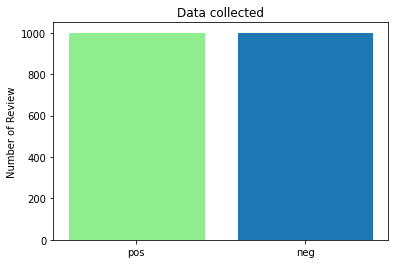

In [ ]:
plot_main = plt.bar(['pos', 'neg'], [len(pos_revs_set),len(pos_revs_set)])
plt.xlabel('')
plt.ylabel('Number of Review')
plt.title('Data collected')
plot_main[0].set_color('lightgreen')
plt.show()

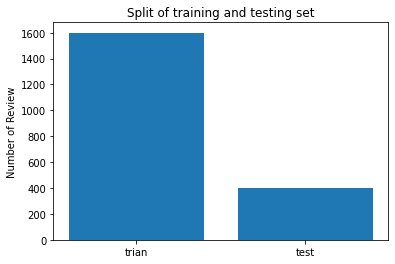

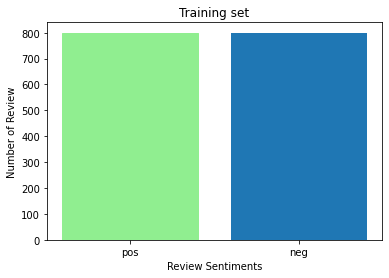

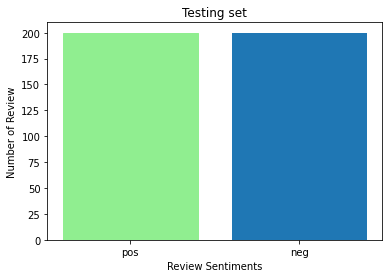

In [ ]:
plt.bar(['trian', 'test'], [len(train_set),len(test_set)])
plt.xlabel('')
plt.ylabel('Number of Review')
plt.title('Split of training and testing set')
plt.show()

plot1 = plt.bar(['pos', 'neg'], [len(pos_revs_set[200:]), len(neg_revs_set[200:])])
plt.xlabel('Review Sentiments')
plt.ylabel('Number of Review')
plt.title('Training set')
plot1[0].set_color('lightgreen')
plt.show()

plot2 = plt.bar(['pos', 'neg'], [len(pos_revs_set[:200]), len(neg_revs_set[:200])])
plt.xlabel('Review Sentiments')
plt.ylabel('Number of Review')
plt.title('Testing set')
plot2[0].set_color('lightgreen')
plt.show()

In [ ]:
classifier = NaiveBayesClassifier.train(train_set)
 
acc = classify.accuracy(classifier, test_set)
print('Accuraccy: ', acc) 
 
print (classifier.show_most_informative_features(10))

Accuraccy:  0.715
Most Informative Features
               ludicrous = True              neg : pos    =     13.4 : 1.0
             outstanding = True              pos : neg    =     11.9 : 1.0
                 idiotic = True              neg : pos    =     11.8 : 1.0
                  avoids = True              pos : neg    =     11.7 : 1.0
                    slip = True              pos : neg    =     11.0 : 1.0
                   alike = True              pos : neg    =     11.0 : 1.0
                    3000 = True              neg : pos    =     11.0 : 1.0
                 insipid = True              neg : pos    =     10.3 : 1.0
              astounding = True              pos : neg    =      9.7 : 1.0
                   dread = True              pos : neg    =      9.7 : 1.0
None


In [ ]:
cust_rev = "It was an amazing movie. I enjoyed it. Great direction and extraordinary acting."
cust_rev_tokens = word_tokenize(cust_rev)
cust_rev_set = bag_of_words(cust_rev_tokens)
print('Sample review 2:', cust_rev)
if classifier.classify(cust_rev_set) == 'pos':
  print('Good movie')
else:
  print('Bad movie')

prob_result = classifier.prob_classify(cust_rev_set)

print ('Negative:', prob_result.prob("neg")) 
print ('Positive:', prob_result.prob("pos"))

Sample review 2: It was an amazing movie. I enjoyed it. Great direction and extraordinary acting.
Good movie
Negative: 0.05600436809678485
Positive: 0.9439956319032141


In [ ]:
cust_rev = "It was horrible. I hated the movie.  Terrible direction and awful acting."
cust_rev_tokens = word_tokenize(cust_rev)
cust_rev_set = bag_of_words(cust_rev_tokens)
print('Sample review 1:', cust_rev)
if classifier.classify(cust_rev_set) == 'pos':
  print('Good movie')
else:
  print('Bad movie')

prob_result = classifier.prob_classify(cust_rev_set)
 
print ('Negative:', prob_result.prob("neg")) 
print ('Positive:', prob_result.prob("pos")) 

Sample review 1: It was horrible. I hated the movie.  Terrible direction and awful acting.
Bad movie
Negative: 0.9803442905163727
Positive: 0.019655709483628065


In [ ]:
## Bigram features
stpwrds_eng = stopwords.words('english')
 

def clean_words(words, stpwrds_eng):
    words_clean = []
    for word in words:
        word = word.lower()
        if word not in stpwrds_eng and word not in string.punctuation:
            words_clean.append(word)    
    return words_clean 
 
def bag_of_words(words):    
    wrds_dic = dict([word, True] for word in words)    
    return wrds_dic
 
def bag_of_ngrms(words, n=2):
    wrds_ng = []
    for item in iter(ngrams(words, n)):
        wrds_ng.append(item)
    wrds_dic = dict([word, True] for word in wrds_ng)    
    return wrds_dic


text = "It was a very good movie."
words = word_tokenize(text.lower())
 
print (words)

print (bag_of_ngrms(words))

words_clean = clean_words(words, stpwrds_eng)
print (words_clean)

important_words = ['above', 'below', 'off', 'over', 'under', 'more', 'most', 'such', 'no', 'nor', 'not', 'only', 'so', 'than', 'too', 'very', 'just', 'but']
 
stpwrds_eng_for_bigrams = set(stpwrds_eng) - set(important_words)
 
clean_wrds_bigrms = clean_words(words, stpwrds_eng_for_bigrams)
print (clean_wrds_bigrms)

uni_featrs = bag_of_words(words_clean)
print (uni_featrs)

bi_featrs = bag_of_ngrms(clean_wrds_bigrms)
print (bi_featrs)

all_featrs = uni_featrs.copy()
all_featrs.update(bi_featrs)
print (all_featrs)

def bag_of_ent_wrds(words, n=2):
    words_clean = clean_words(words, stpwrds_eng)
    clean_wrds_bigrms = clean_words(words, stpwrds_eng_for_bigrams)
 
    uni_featrs = bag_of_words(words_clean)
    bi_featrs = bag_of_ngrms(clean_wrds_bigrms)
 
    all_featrs = uni_featrs.copy()
    all_featrs.update(bi_featrs)
 
    return all_featrs
 
print (bag_of_ent_wrds(words))


['it', 'was', 'a', 'very', 'good', 'movie', '.']
{('it', 'was'): True, ('was', 'a'): True, ('a', 'very'): True, ('very', 'good'): True, ('good', 'movie'): True, ('movie', '.'): True}
['good', 'movie']
['very', 'good', 'movie']
{'good': True, 'movie': True}
{('very', 'good'): True, ('good', 'movie'): True}
{'good': True, 'movie': True, ('very', 'good'): True, ('good', 'movie'): True}
{'good': True, 'movie': True, ('very', 'good'): True, ('good', 'movie'): True}


In [ ]:
pos_reviews = []
for fileid in movie_reviews.fileids('pos'):
    words = movie_reviews.words(fileid)
    pos_reviews.append(words)
 
neg_revs = []
for fileid in movie_reviews.fileids('neg'):
    words = movie_reviews.words(fileid)
    neg_revs.append(words)

In [ ]:
pos_revs_set = []
for words in pos_revs:
    pos_revs_set.append((bag_of_ent_wrds(words), 'pos'))
 
neg_revs_set = []
for words in neg_revs:
    neg_revs_set.append((bag_of_ent_wrds(words), 'neg'))

In [ ]:
print (len(pos_revs_set), len(neg_revs_set))
shuffle(pos_revs_set)
shuffle(neg_revs_set)
 
test_set = pos_revs_set[:200] + neg_revs_set[:200]
train_set = pos_revs_set[200:] + neg_revs_set[200:]
 
print(len(test_set),  len(train_set))


1000 1000
400 1600


In [ ]:
classifier = NaiveBayesClassifier.train(train_set)
 
acc = classify.accuracy(classifier, test_set)
print('Accuraccy: ', acc) 
 
print (classifier.show_most_informative_features(10))

Accuraccy:  0.785
Most Informative Features
       ('waste', 'time') = True              neg : pos    =     13.8 : 1.0
               strongest = True              pos : neg    =     11.7 : 1.0
              vulnerable = True              pos : neg    =     11.7 : 1.0
                  avoids = True              pos : neg    =     11.7 : 1.0
               stupidity = True              neg : pos    =     11.0 : 1.0
     ('very', 'similar') = True              pos : neg    =     11.0 : 1.0
        ('one', 'worst') = True              neg : pos    =     10.6 : 1.0
             outstanding = True              pos : neg    =     10.3 : 1.0
       ('but', 'script') = True              neg : pos    =     10.3 : 1.0
              unoriginal = True              neg : pos    =     10.3 : 1.0
None


In [ ]:
cust_rev = "It was horrible. I hated the movie.  Terrible direction and awful acting."
cust_rev_tokens = word_tokenize(cust_rev)
cust_rev_set = bag_of_ent_wrds(cust_rev_tokens)

print('Sample review 1:', cust_rev)
if classifier.classify(cust_rev_set) == 'pos':
  print('Good movie')
else:
  print('Bad movie')

prob_result = classifier.prob_classify(cust_rev_set)

print ('Negative:', prob_result.prob("neg")) 
print ('Positive:', prob_result.prob("pos")) 
 

Sample review 1: It was horrible. I hated the movie.  Terrible direction and awful acting.
Bad movie
Negative: 0.9991328584066966
Positive: 0.0008671415933035782


In [ ]:
cust_rev = "It was an amazing movie. I enjoyed it. Great direction and extraordinary acting."
cust_rev_tokens = word_tokenize(cust_rev)
cust_rev_set = bag_of_ent_wrds(cust_rev_tokens)
 
print('Sample review 2:', cust_rev)
if classifier.classify(cust_rev_set) == 'pos':
  print('Good movie')
else:
  print('Bad movie')

prob_result = classifier.prob_classify(cust_rev_set)

print ('Negative:', prob_result.prob("neg")) 
print ('Positive:', prob_result.prob("pos")) 

Sample review 2: It was an amazing movie. I enjoyed it. Great direction and extraordinary acting.
Good movie
Negative: 0.0023799287646021775
Positive: 0.9976200712353998
